In [ ]:
#This is the Schrodinger's cat experiment

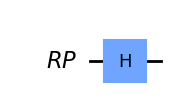

In [8]:
#QuantumRegister is used to create a quantum register with n qubits,
#ClassicalRegister is used to create a classical register with n bits,
#QuantumCircuit is used to create a quantum circuit with qubits and bits.
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

#radiioactive particle = rp, quantum circuit = qc
rp = QuantumRegister(1, name="RP")
qc = QuantumCircuit(rp)

#Here, we will implement a Hadamard gate on the radioactive particle. 
#This will put the particle in a superposition state, where it can be in 
#either the |0⟩ or |1⟩ state with 50% probability each.
qc.h(rp[0])

qc.draw("mpl")

In [9]:
#Next, we will implement a classical bit in order to capture the 
#measurement of the radioactive particles.
qc.measure_all()

from qiskit_aer import AerSimulator 

#Here, we will use the AerSimulator to simulate the quantum circuit.
#The default number of simulation for qiskit is 1024.
backend = AerSimulator()
result = backend.run(qc).result()

#The result of the simulation is stored in the counts variable,
#and displayed as a dictionary.
#At the same time, this will test whether the gate is truely working
print(result.get_counts())

{'1': 532, '0': 492}


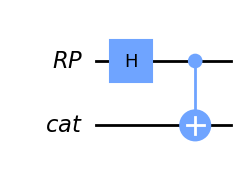

In [10]:
cat = QuantumRegister(1, name="cat")
qc = QuantumCircuit(rp, cat)

#similar to before, a Hadamard gate is on the radioactive particle.
qc.h(rp[0])

#Next, we will implement a controlled-NOT gate, where the radioactive
#particle is the control qubit, and the cat is the target qubit.
#This will entangle the radioactive particle and the cat.
#The initial state of the cat is |0⟩, and after the entanglement,
#if the radioactive particle is|1⟩, NOT(cat), causing the cat to be 
#in the |1⟩ state, else it remains in the |0⟩ state.
qc.cx(rp[0], cat[0])

qc.draw("mpl")

In [36]:
#This is similar to the above section
qc.measure_all()

result = backend.run(qc).result()

print(result.get_counts())


{'11 11': 515, '00 00': 509}


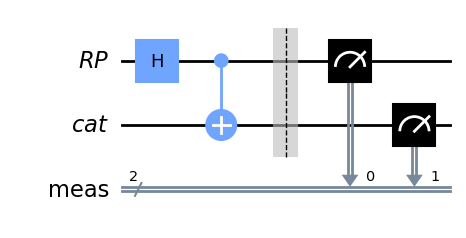

In [35]:
qc.draw("mpl")


In [53]:

result = backend.run(qc, shots=1).result()

print(result.get_counts())

{'00': 1}


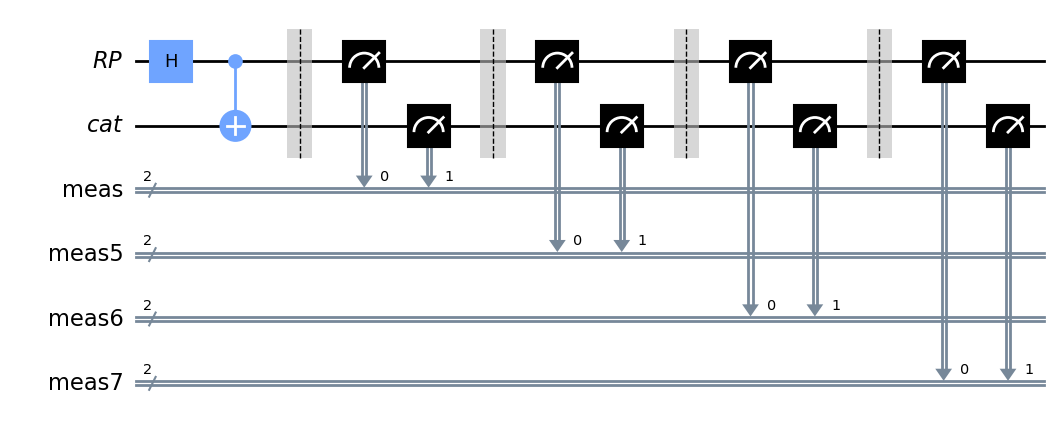

In [23]:
qc.draw("mpl")

C:\Users\lukef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


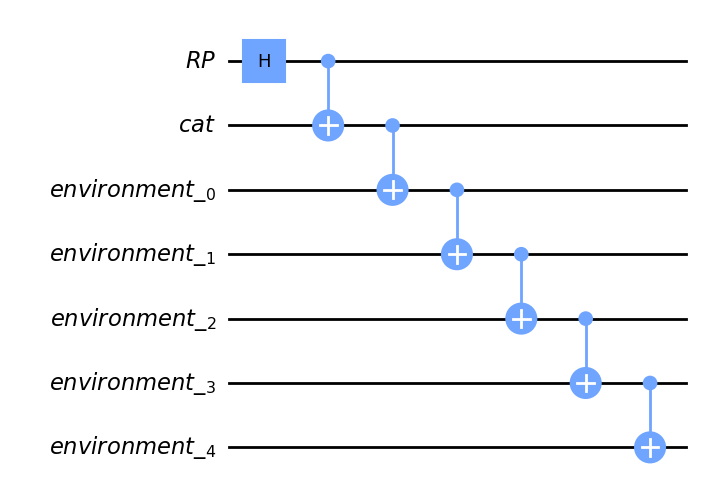

In [21]:
env = QuantumRegister(5, name='environment_')

qc = QuantumCircuit(rp, cat, env)

qc.h(rp)

qc.cx(rp, cat)


qc.cx(cat, env[0])
qc.cx(env[0], env[1])
qc.cx(env[1], env[2])
qc.cx(env[2], env[3])
qc.cx(env[3], env[4])

qc.draw("mpl")

In [22]:
qc.measure_all()

result = backend.run(qc).result()

print(result.get_counts())

{'0000000': 537, '1111111': 487}


C:\Users\lukef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


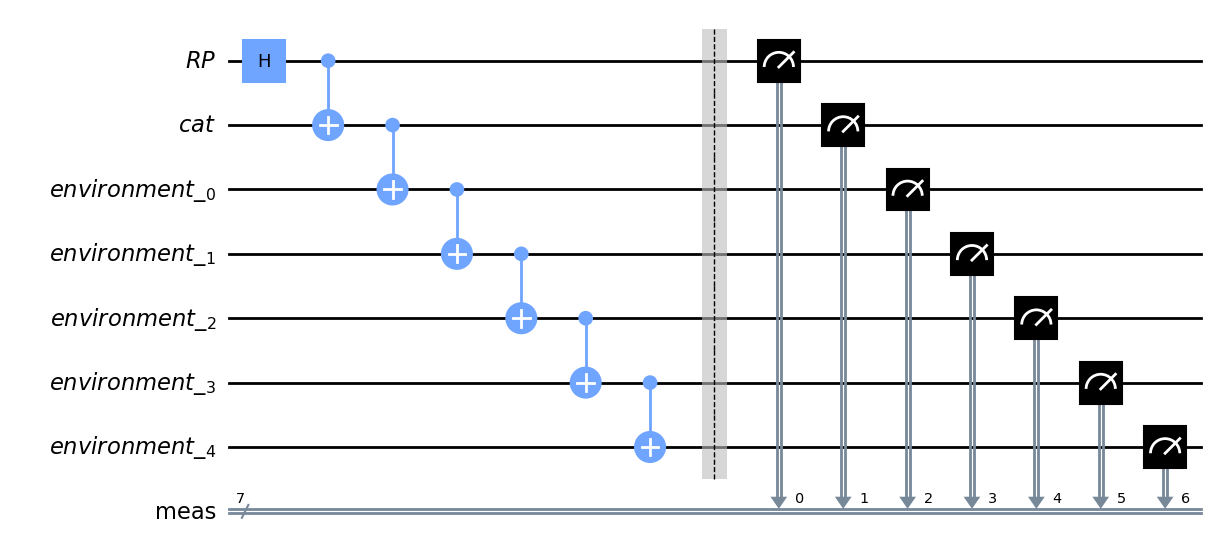

In [23]:
qc.draw("mpl")